In [1]:
import os
import random
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
#pip install split-folders
import splitfolders

from IPython.display import display
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications.densenet import (DenseNet121,
                                                    preprocess_input)
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import (BatchNormalization, Dense,
                                     Dropout, Flatten, Input)
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model
classifier = load_model('densenet121.hdf5')

In [3]:
def predict(image_path):
    from skimage import io
    from keras.preprocessing import image
    #path='imbalanced/Scratch/Scratch_400.jpg'
    import tensorflow as tf

    img = tf.keras.utils.load_img(image_path, grayscale=False, target_size=(100, 100))
    # tf.keras.utils.load_img() is a utility function in Keras used for loading an image into a PIL (Python Imaging Library) object.
    # image_path: The path of the image file to load.
    # grayscale: Boolean value that determines if the image should be loaded in grayscale mode. The default value is False.
    # target_size: A tuple of integers representing the desired size of the image. The default value is (256, 256)

    show_img=tf.keras.utils.load_img(image_path, grayscale=False, target_size=(100, 100))
    p_class = ['normal','umpire']
    x = tf.keras.utils.img_to_array(img)
    # tf.keras.utils.img_to_array() function can be used to convert a PIL image instance to a NumPy array.
    # img is the PIL image instance that was loaded using tf.keras.utils.load_img()
    # The resulting x is a NumPy array of shape (100, 100, 3) (assuming target_size=(100, 100) and grayscale=False).

    x = np.expand_dims(x, axis = 0)
    # This line of code is used to add an extra dimension to the numpy array.
    # we add a new dimension to the array x at position 0, which represents the batch size.
    # The expand_dims function adds a new dimension to the array, making it suitable to pass as input to the neural network.

    
    x /= 255

    custom = classifier.predict(x)
    print(custom[0])



    #x = x.reshape([64, 64]);

    #plt.gray()
    plt.imshow(show_img)
    plt.show()

    a=custom[0]
    ind=np.argmax(a)

    print('Prediction:',p_class[ind])
    f=open('output.txt','w')
    f.write(str(p_class[ind]))
    f.close()
    return str(p_class[ind])


In [4]:
import cv2
import time
def capture_image():
    

    # access the default camera (usually USB webcam)
    cap = cv2.VideoCapture(1)
    if not cap.isOpened():
        print("Error: Could not open camera.")
        return 0
    else:
        ret, frame = cap.read()
        cv2.imwrite("img.jpg", frame)
        cap.release()


In [5]:
capture_image()

1/1 [==============================] - 0s 77ms/step
[0.9926196  0.00738047]


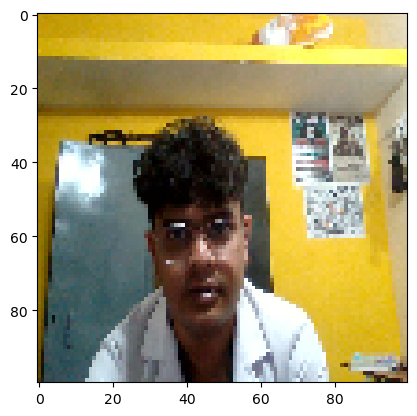

Prediction: normal
normal
1/1 [==============================] - 0s 76ms/step
[0.8140371  0.18596289]


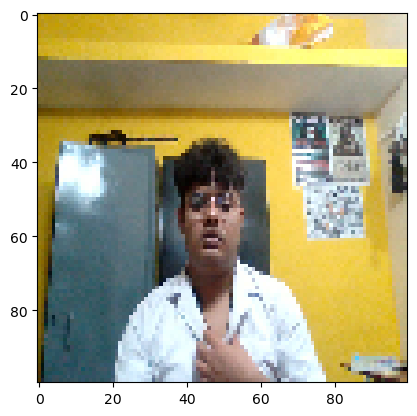

Prediction: normal
normal
1/1 [==============================] - 0s 76ms/step
[0.9455769 0.0544231]


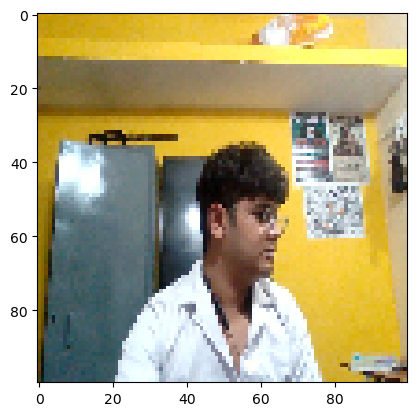

Prediction: normal
normal
1/1 [==============================] - 0s 86ms/step
[6.296566e-04 9.993704e-01]


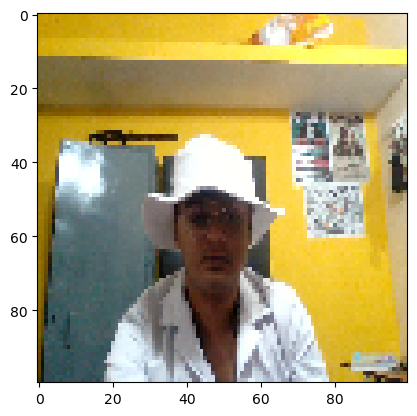

Prediction: umpire
umpire
1/1 [==============================] - 0s 91ms/step
[0.00448101 0.9955189 ]


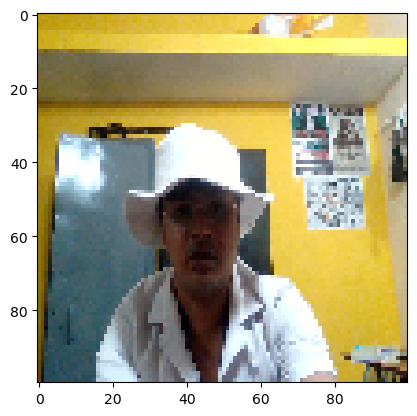

Prediction: umpire
umpire
1/1 [==============================] - 0s 75ms/step
[0.00145411 0.9985459 ]


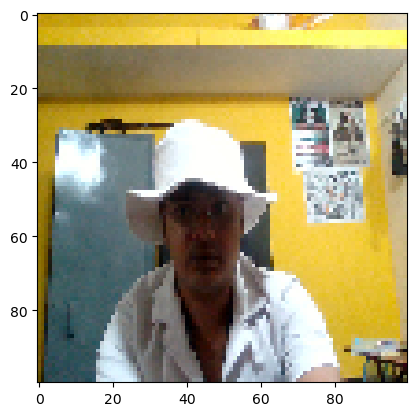

Prediction: umpire
umpire
1/1 [==============================] - 0s 100ms/step
[0.00379917 0.99620086]


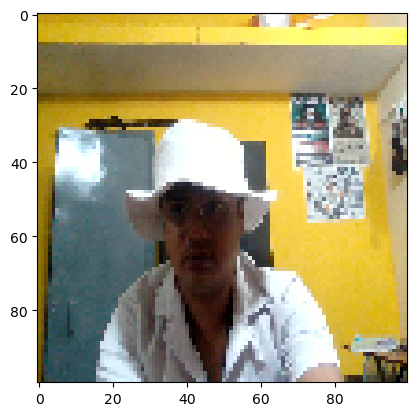

Prediction: umpire
umpire
1/1 [==============================] - 0s 90ms/step
[3.3333056e-04 9.9966669e-01]


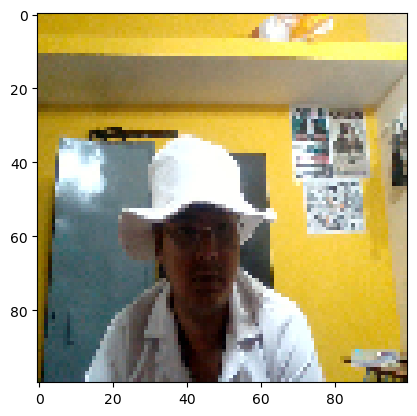

Prediction: umpire
umpire
1/1 [==============================] - 0s 90ms/step
[1.3262103e-04 9.9986732e-01]


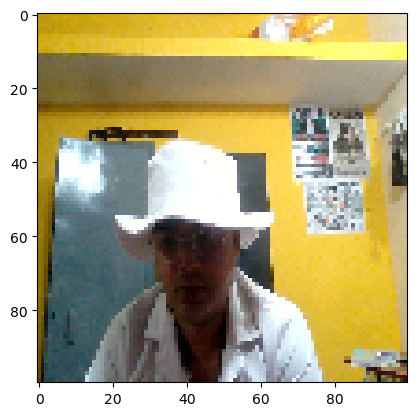

Prediction: umpire
umpire
1/1 [==============================] - 0s 88ms/step
[0.00309552 0.99690443]


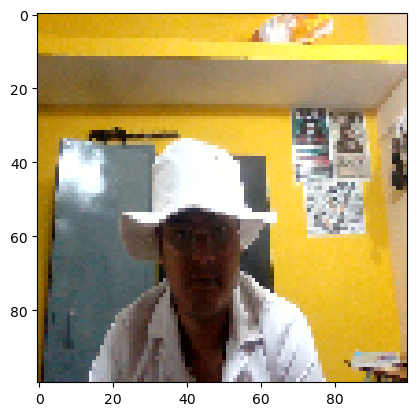

Prediction: umpire
umpire
1/1 [==============================] - 0s 112ms/step
[0.24846159 0.75153834]


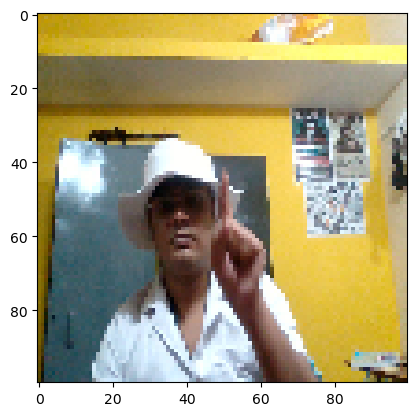

Prediction: umpire
umpire
1/1 [==============================] - 0s 110ms/step
[6.833903e-04 9.993166e-01]


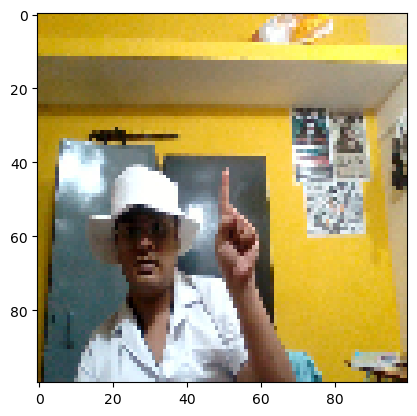

Prediction: umpire
umpire
1/1 [==============================] - 0s 166ms/step
[0.00225595 0.9977441 ]


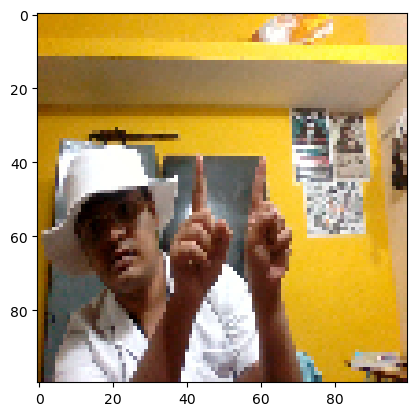

Prediction: umpire
umpire
1/1 [==============================] - 0s 85ms/step
[3.8770169e-05 9.9996126e-01]


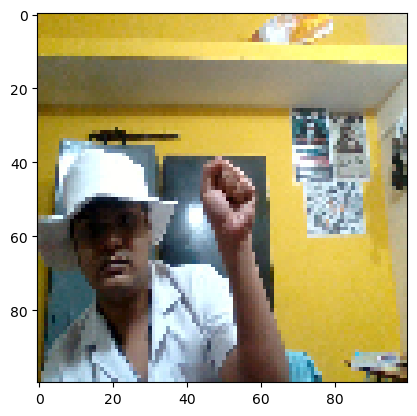

Prediction: umpire
umpire
1/1 [==============================] - 0s 85ms/step
[0.06823213 0.9317678 ]


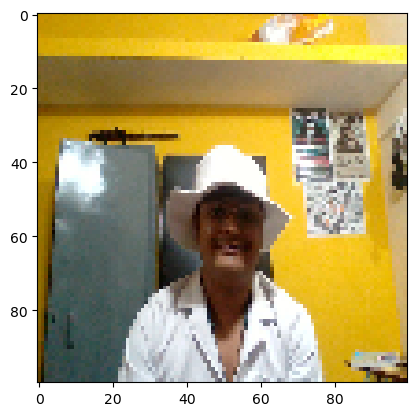

Prediction: umpire
umpire
1/1 [==============================] - 0s 87ms/step
[3.9668803e-06 9.9999607e-01]


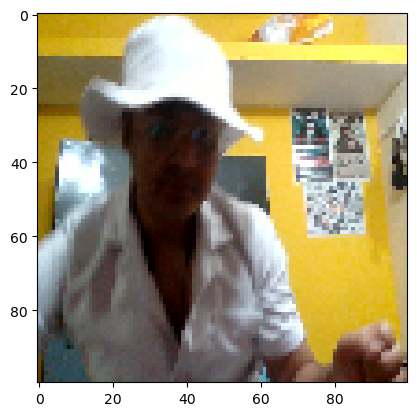

Prediction: umpire
umpire
1/1 [==============================] - 0s 98ms/step
[2.1272010e-06 9.9999785e-01]


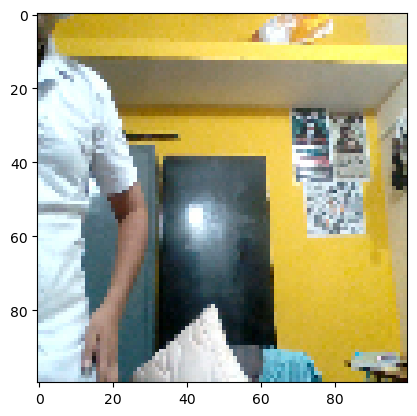

Prediction: umpire
umpire
1/1 [==============================] - 0s 93ms/step
[0.00117452 0.9988255 ]


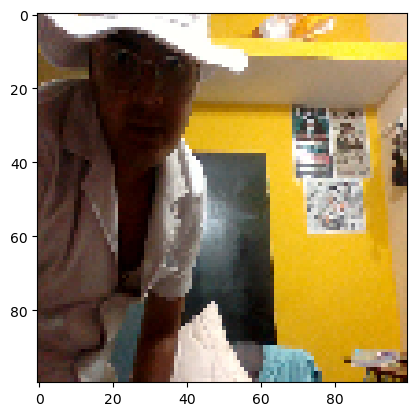

Prediction: umpire
umpire
1/1 [==============================] - 0s 119ms/step
[8.484445e-05 9.999151e-01]


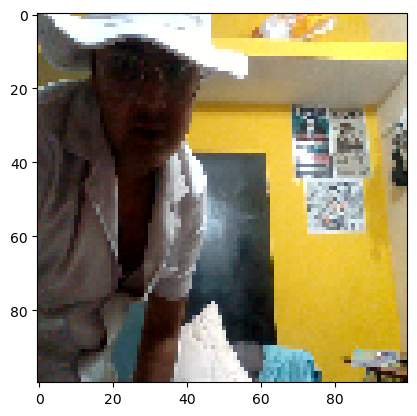

Prediction: umpire
umpire
1/1 [==============================] - 0s 96ms/step
[0.00542619 0.9945739 ]


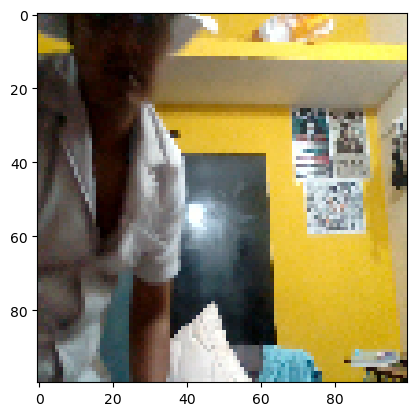

Prediction: umpire
umpire
1/1 [==============================] - 0s 95ms/step
[2.6652235e-05 9.9997330e-01]


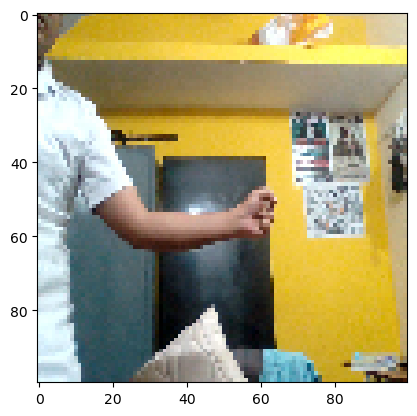

Prediction: umpire
umpire
1/1 [==============================] - 0s 103ms/step
[1.6965478e-05 9.9998307e-01]


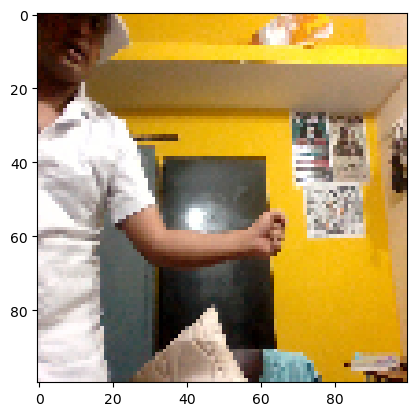

Prediction: umpire
umpire
1/1 [==============================] - 0s 146ms/step
[6.0722482e-04 9.9939275e-01]


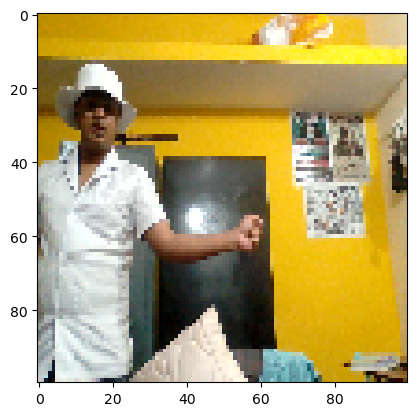

Prediction: umpire
umpire
1/1 [==============================] - 0s 107ms/step
[9.0508894e-07 9.9999905e-01]


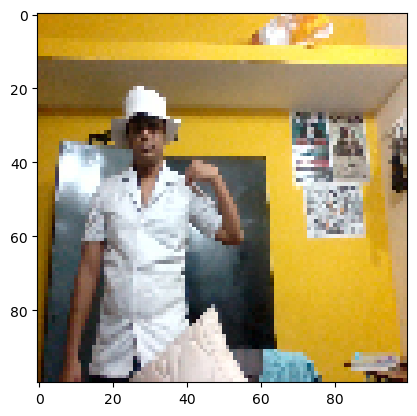

Prediction: umpire
umpire
1/1 [==============================] - 0s 108ms/step
[6.141183e-07 9.999994e-01]


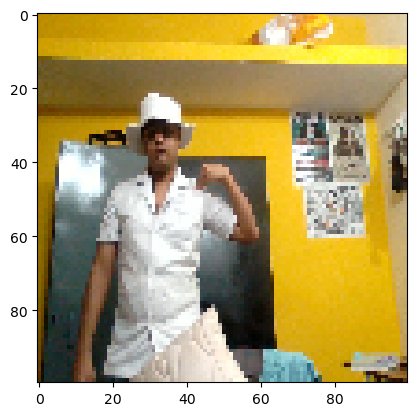

Prediction: umpire
umpire
1/1 [==============================] - 0s 121ms/step
[2.5392415e-05 9.9997461e-01]


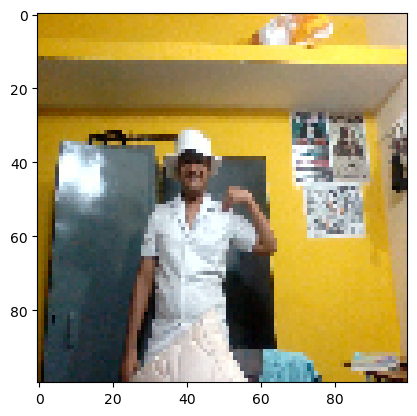

Prediction: umpire
umpire
1/1 [==============================] - 0s 133ms/step
[0.00114613 0.9988539 ]


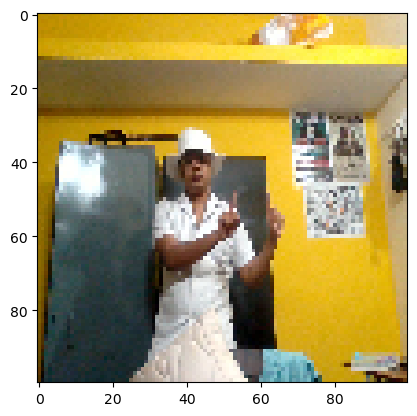

Prediction: umpire
umpire
1/1 [==============================] - 0s 108ms/step
[2.0226158e-05 9.9997973e-01]


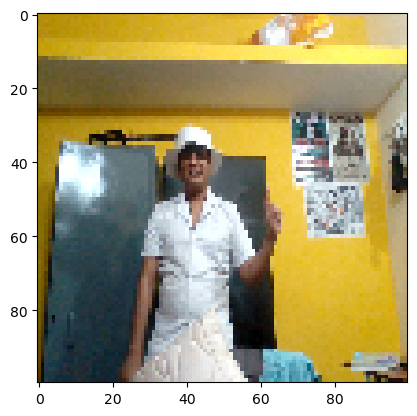

Prediction: umpire
umpire
1/1 [==============================] - 0s 119ms/step
[2.4045908e-06 9.9999762e-01]


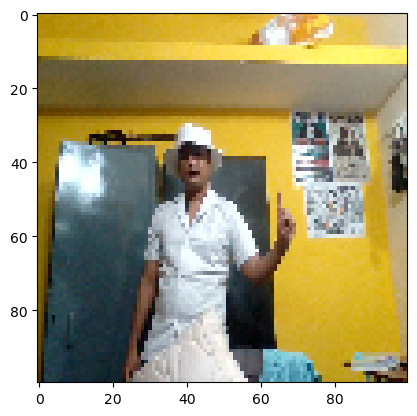

Prediction: umpire
umpire
1/1 [==============================] - 0s 122ms/step
[1.1374526e-05 9.9998868e-01]


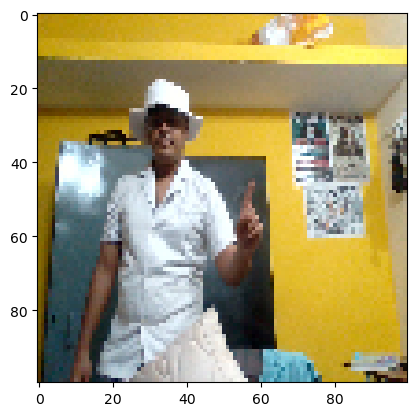

Prediction: umpire
umpire
1/1 [==============================] - 0s 81ms/step
[0.02725508 0.97274494]


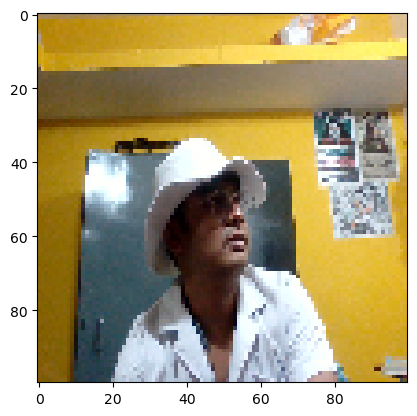

Prediction: umpire
umpire
1/1 [==============================] - 0s 136ms/step
[4.777550e-04 9.995222e-01]


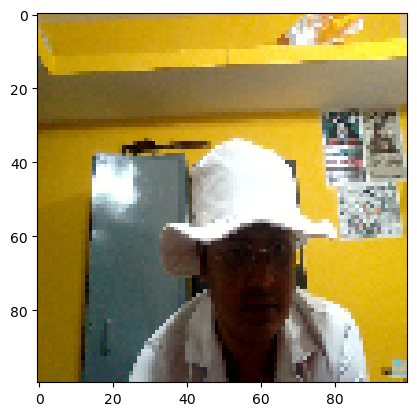

Prediction: umpire
umpire
1/1 [==============================] - 0s 87ms/step
[0.09944625 0.90055376]


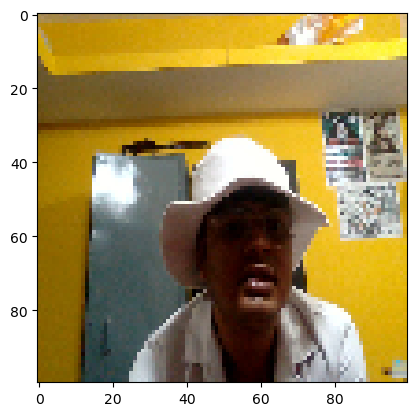

Prediction: umpire
umpire
1/1 [==============================] - 0s 87ms/step
[0.01293625 0.98706377]


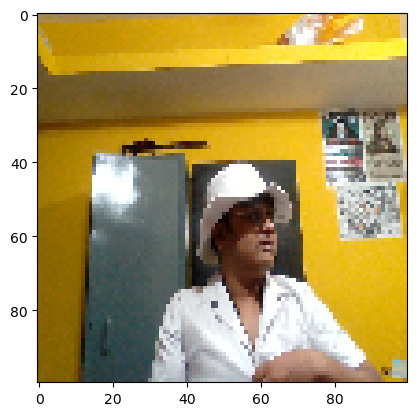

Prediction: umpire
umpire
1/1 [==============================] - 0s 78ms/step
[0.00166371 0.99833626]


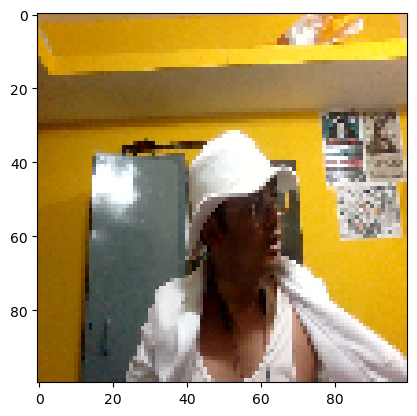

Prediction: umpire
umpire
1/1 [==============================] - 0s 81ms/step
[0.00109452 0.9989054 ]


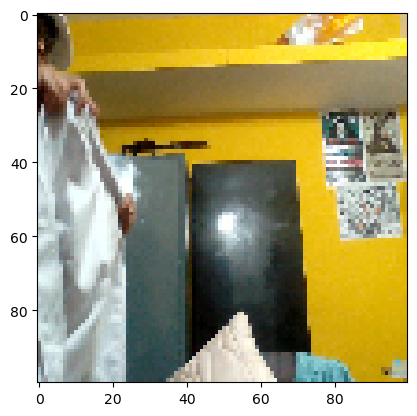

Prediction: umpire
umpire
1/1 [==============================] - 0s 87ms/step
[0.9287744  0.07122561]


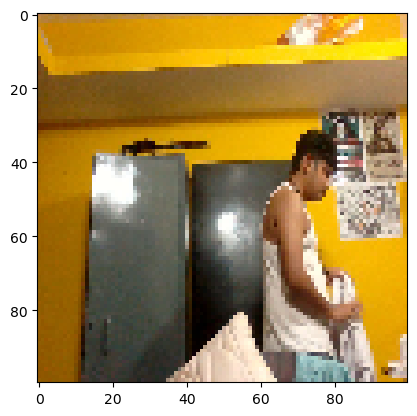

Prediction: normal
normal
1/1 [==============================] - 0s 93ms/step
[0.03855842 0.96144164]


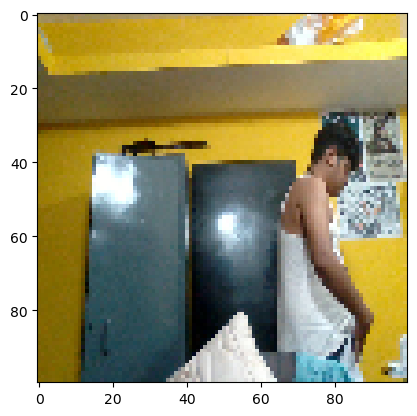

Prediction: umpire
umpire
1/1 [==============================] - 0s 73ms/step
[0.79630625 0.20369372]


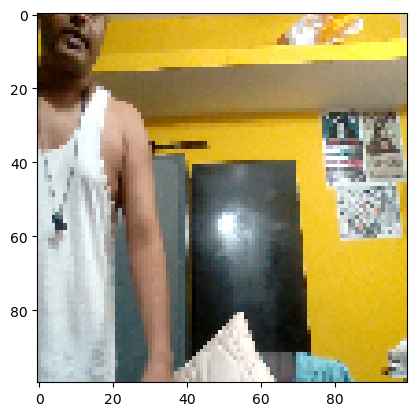

Prediction: normal
normal
1/1 [==============================] - 0s 84ms/step
[0.9349572  0.06504275]


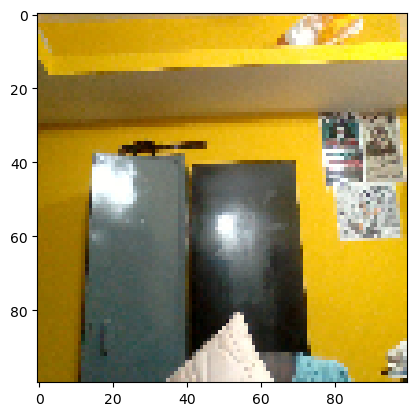

Prediction: normal
normal
1/1 [==============================] - 0s 76ms/step
[0.9028047  0.09719535]


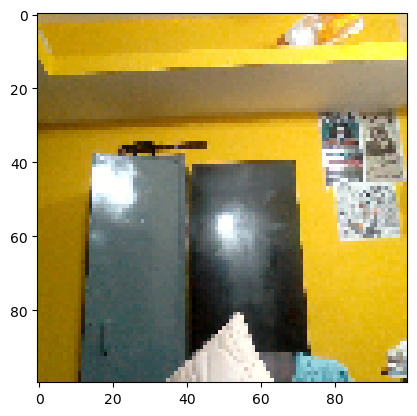

Prediction: normal
normal
1/1 [==============================] - 0s 86ms/step
[0.5579867  0.44201332]


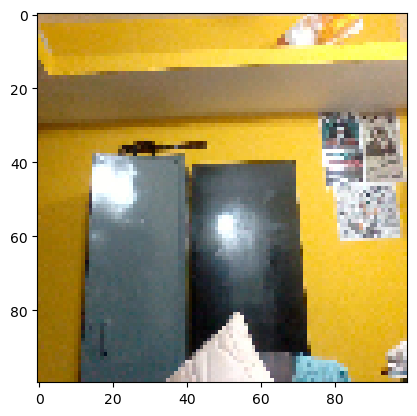

Prediction: normal
normal
1/1 [==============================] - 0s 75ms/step
[0.96597636 0.03402363]


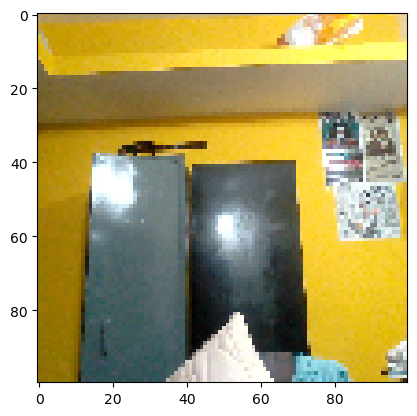

Prediction: normal
normal
1/1 [==============================] - 0s 83ms/step
[0.8691543  0.13084567]


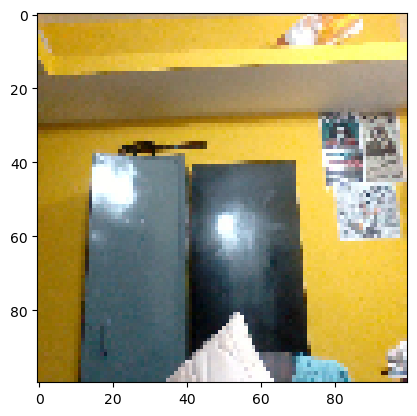

Prediction: normal
normal
1/1 [==============================] - 0s 78ms/step
[0.9389444  0.06105564]


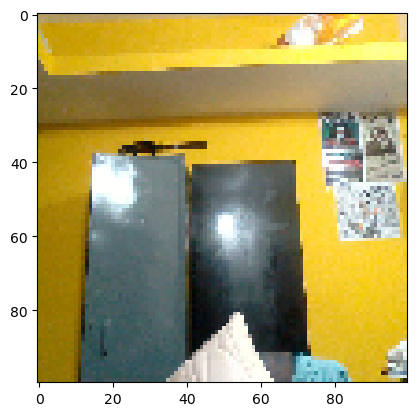

Prediction: normal
normal
1/1 [==============================] - 0s 73ms/step
[0.91719383 0.08280612]


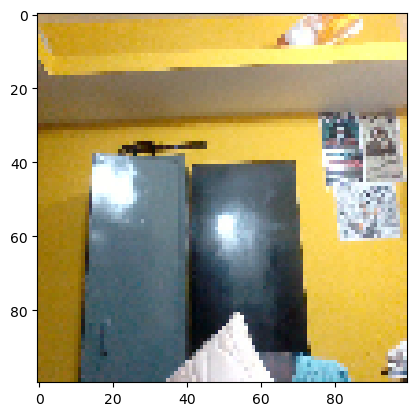

Prediction: normal
normal
1/1 [==============================] - 0s 85ms/step
[0.715295 0.284705]


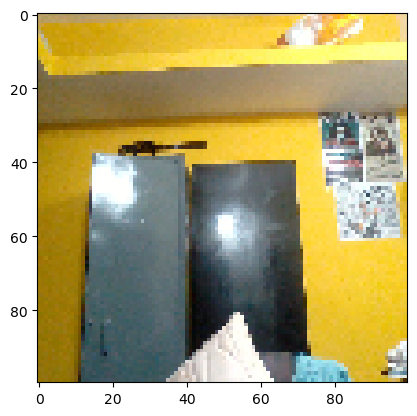

Prediction: normal
normal
1/1 [==============================] - 0s 90ms/step
[0.5892516  0.41074836]


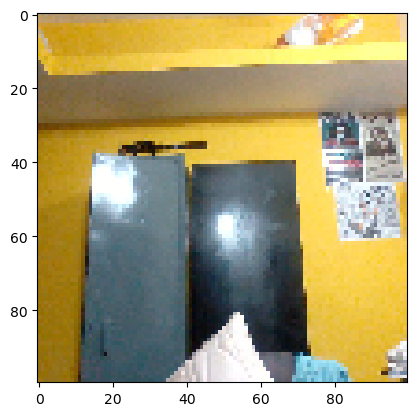

Prediction: normal
normal
1/1 [==============================] - 0s 87ms/step
[0.5374304  0.46256956]


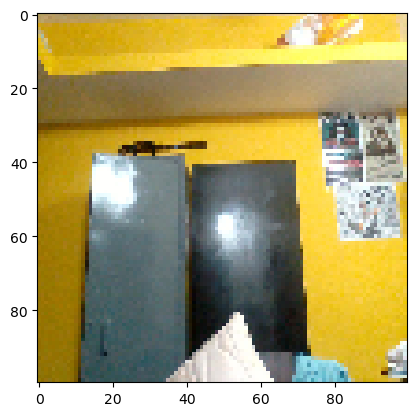

Prediction: normal
normal
1/1 [==============================] - 0s 89ms/step
[0.87542814 0.1245719 ]


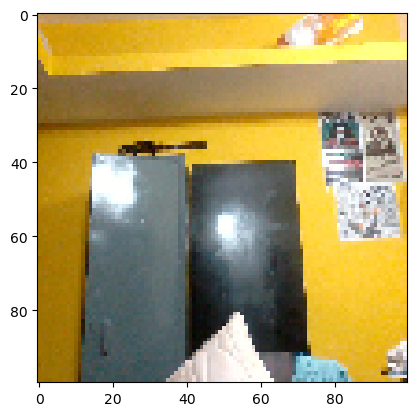

Prediction: normal
normal
1/1 [==============================] - 0s 82ms/step
[0.790973 0.209027]


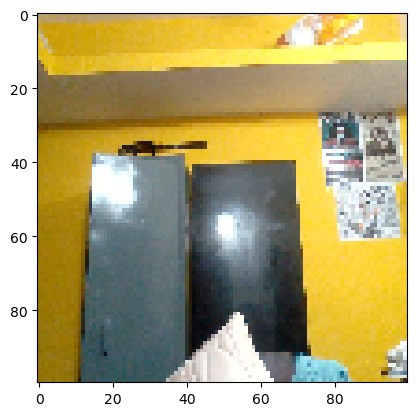

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.8344482  0.16555181]


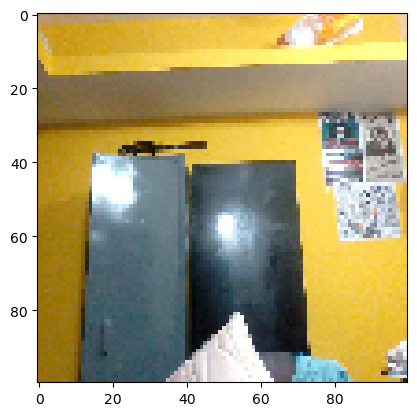

Prediction: normal
normal
1/1 [==============================] - 0s 78ms/step
[0.3473257 0.6526743]


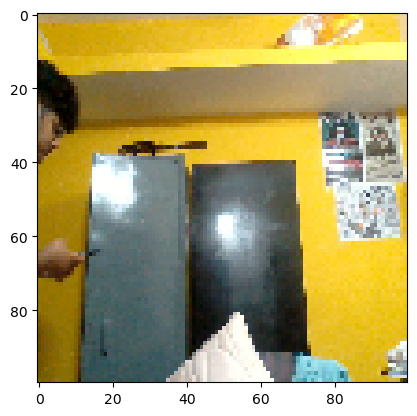

Prediction: umpire
umpire
1/1 [==============================] - 0s 83ms/step
[0.8827593 0.1172407]


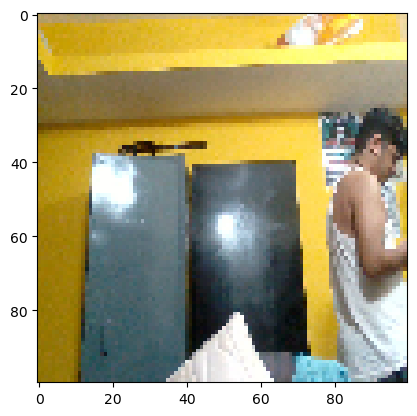

Prediction: normal
normal
1/1 [==============================] - 0s 79ms/step
[0.9984816  0.00151847]


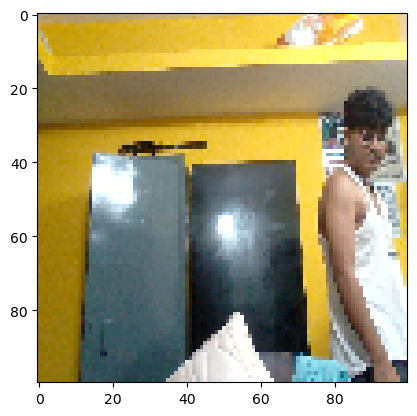

Prediction: normal
normal
1/1 [==============================] - 0s 79ms/step
[9.9985862e-01 1.4131483e-04]


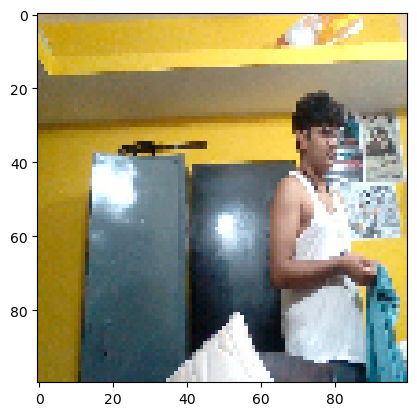

Prediction: normal
normal
1/1 [==============================] - 0s 82ms/step
[0.96300924 0.03699078]


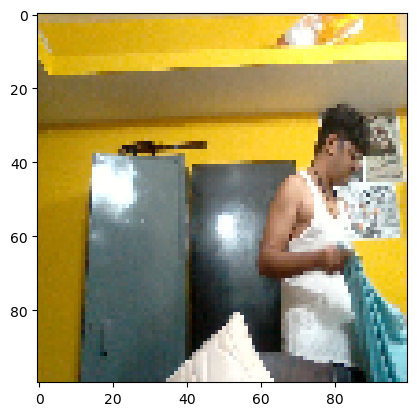

Prediction: normal
normal
1/1 [==============================] - 0s 86ms/step
[9.9986279e-01 1.3717558e-04]


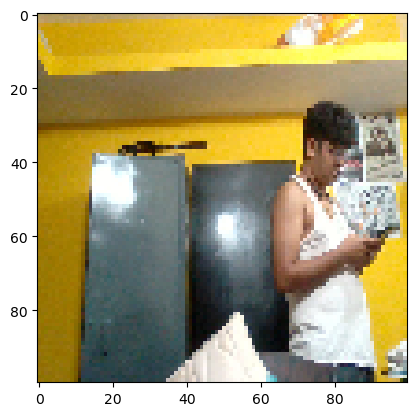

Prediction: normal
normal
1/1 [==============================] - 0s 76ms/step
[0.98611647 0.01388349]


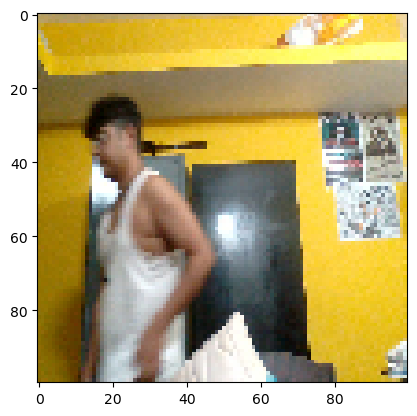

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.43643144 0.56356853]


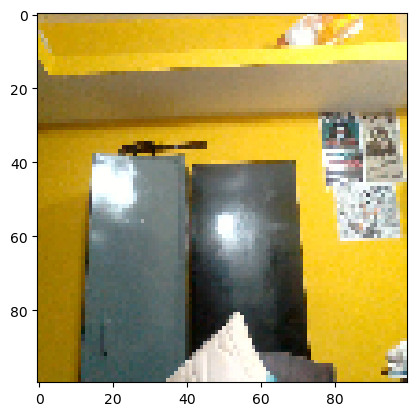

Prediction: umpire
umpire
1/1 [==============================] - 0s 82ms/step
[9.9957591e-01 4.2409918e-04]


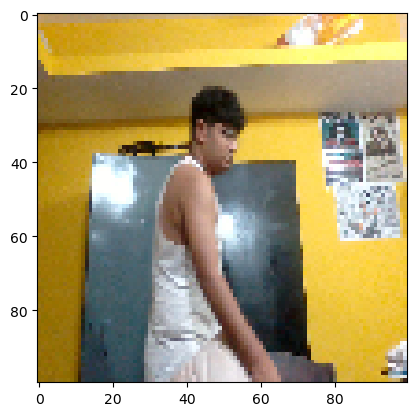

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.9965892  0.00341083]


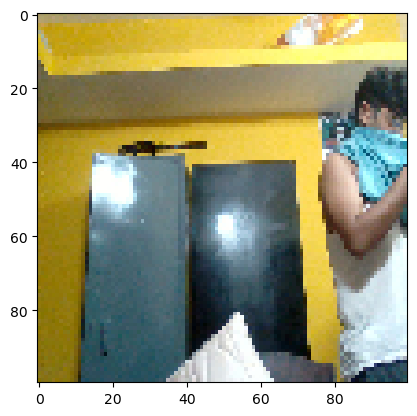

Prediction: normal
normal
1/1 [==============================] - 0s 88ms/step
[0.87071234 0.12928772]


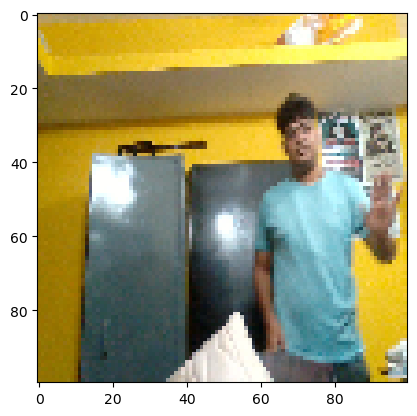

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.61616695 0.38383305]


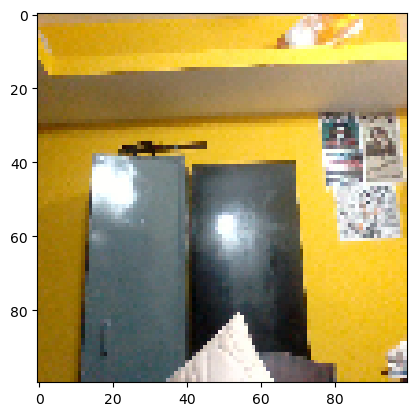

Prediction: normal
normal
1/1 [==============================] - 0s 95ms/step
[0.95038176 0.04961829]


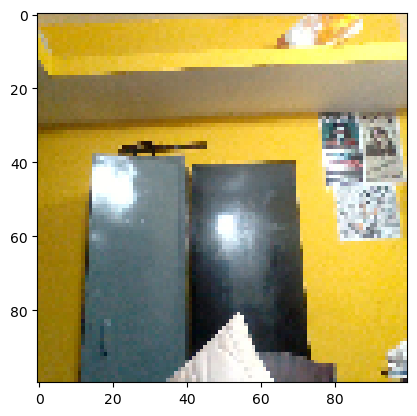

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.07309649 0.9269035 ]


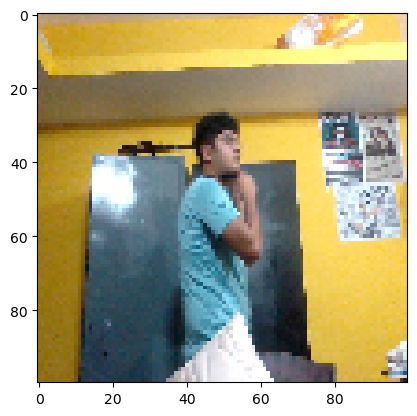

Prediction: umpire
umpire
1/1 [==============================] - 0s 86ms/step
[9.991217e-01 8.783098e-04]


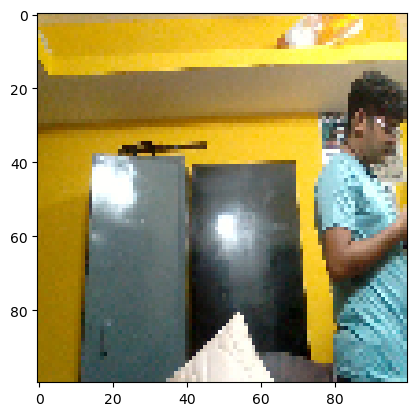

Prediction: normal
normal
1/1 [==============================] - 0s 85ms/step
[0.98965    0.01035005]


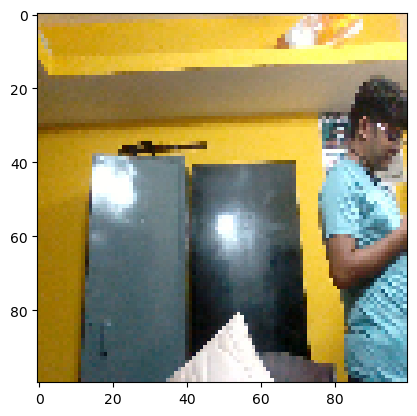

Prediction: normal
normal
1/1 [==============================] - 0s 84ms/step
[0.97423005 0.02576998]


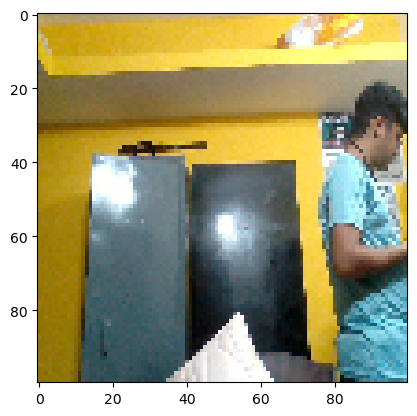

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[0.34465143 0.6553486 ]


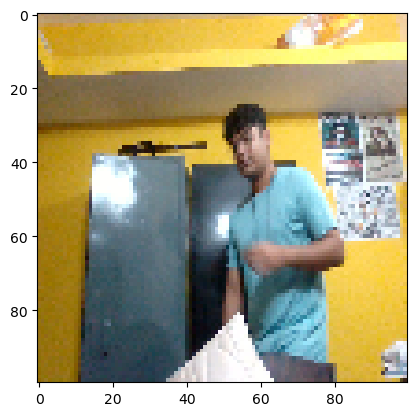

Prediction: umpire
umpire
1/1 [==============================] - 0s 79ms/step
[4.296950e-04 9.995703e-01]


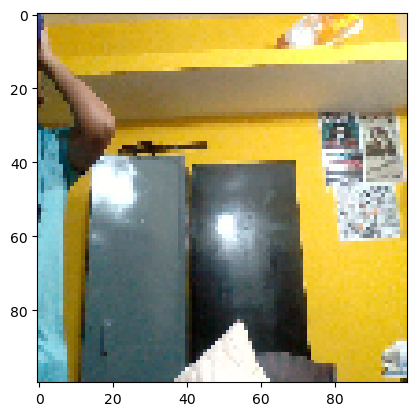

Prediction: umpire
umpire
1/1 [==============================] - 0s 74ms/step
[0.00932379 0.99067616]


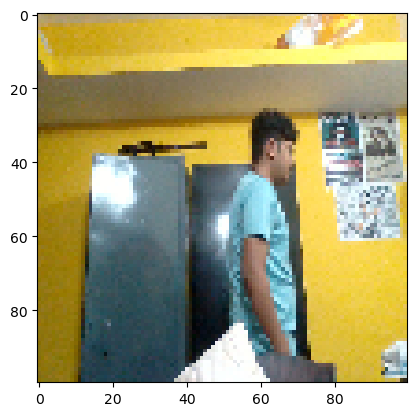

Prediction: umpire
umpire
1/1 [==============================] - 0s 78ms/step
[9.995048e-01 4.951674e-04]


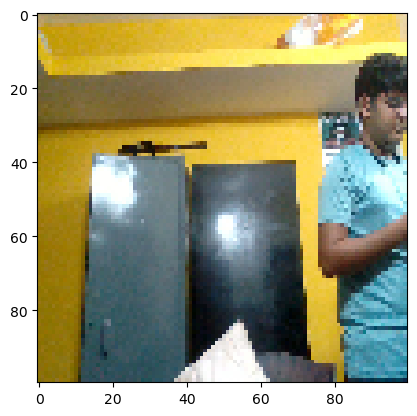

Prediction: normal
normal
1/1 [==============================] - 0s 88ms/step
[0.99459755 0.00540239]


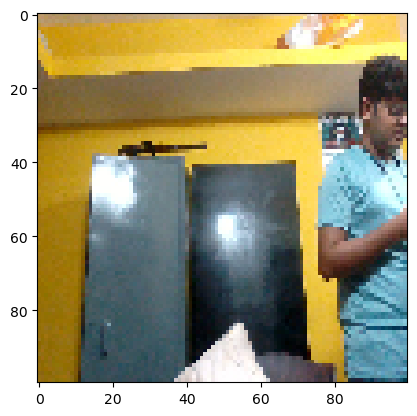

Prediction: normal
normal
1/1 [==============================] - 0s 83ms/step
[0.9984693  0.00153069]


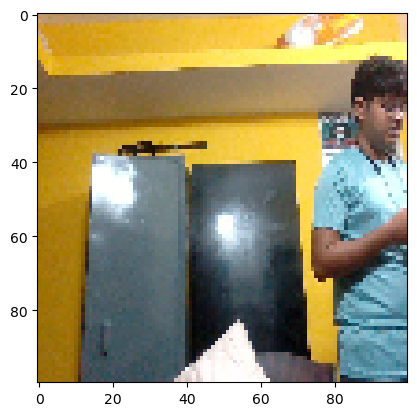

Prediction: normal
normal
1/1 [==============================] - 0s 80ms/step
[9.990727e-01 9.273063e-04]


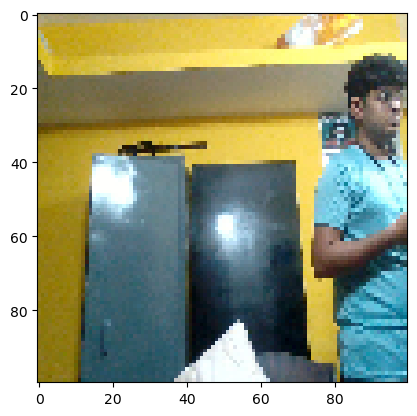

Prediction: normal
normal
1/1 [==============================] - 0s 81ms/step
[0.98364246 0.01635757]


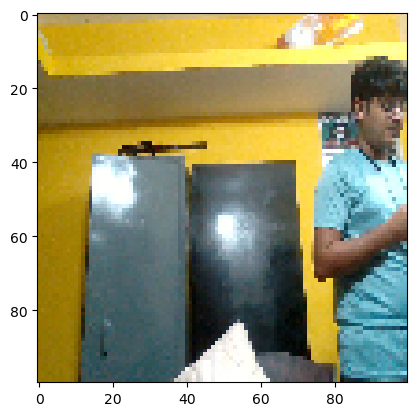

Prediction: normal
normal
1/1 [==============================] - 0s 85ms/step
[0.9981141  0.00188587]


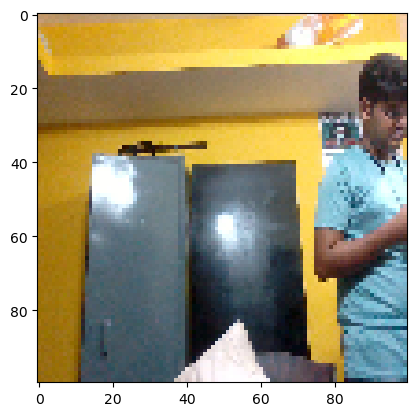

Prediction: normal
normal
1/1 [==============================] - 0s 75ms/step
[0.9984547 0.0015453]


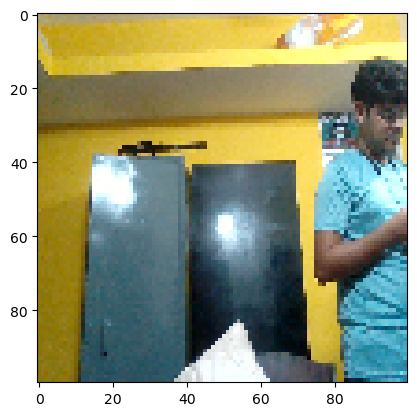

Prediction: normal
normal
1/1 [==============================] - 0s 84ms/step
[0.9989844  0.00101555]


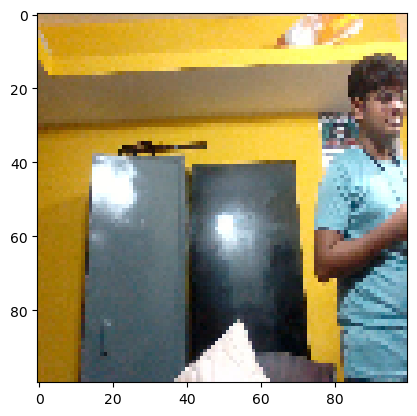

Prediction: normal
normal
1/1 [==============================] - 0s 87ms/step
[0.97521925 0.02478069]


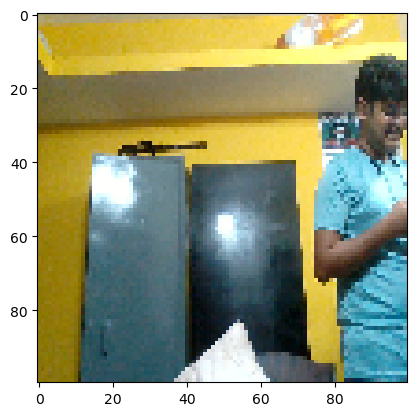

Prediction: normal
normal
1/1 [==============================] - 0s 82ms/step
[9.9928635e-01 7.1365217e-04]


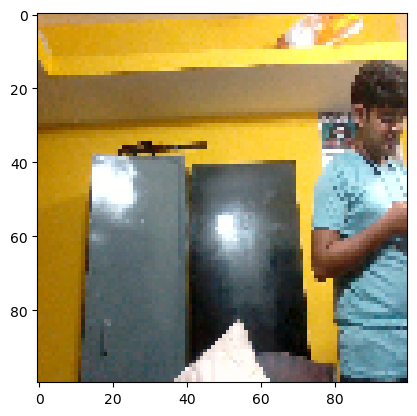

Prediction: normal
normal
1/1 [==============================] - 0s 76ms/step
[0.18759817 0.81240183]


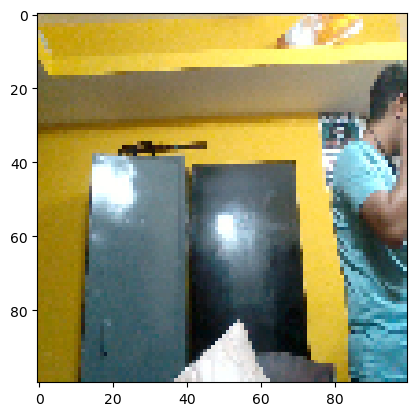

Prediction: umpire
umpire
1/1 [==============================] - 0s 80ms/step
[0.00303237 0.9969676 ]


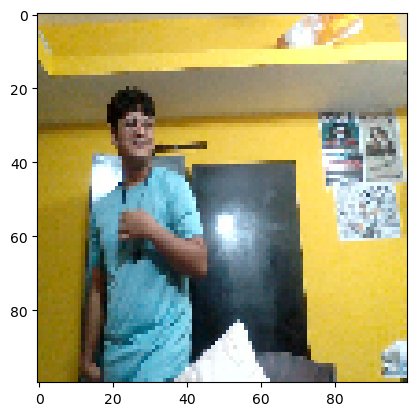

Prediction: umpire
umpire
1/1 [==============================] - 0s 106ms/step
[9.9950123e-01 4.9874163e-04]


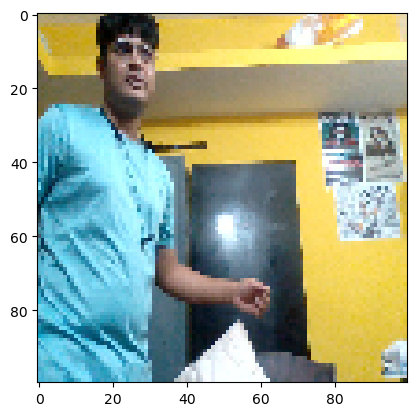

Prediction: normal
normal
1/1 [==============================] - 0s 85ms/step
[0.01625529 0.98374474]


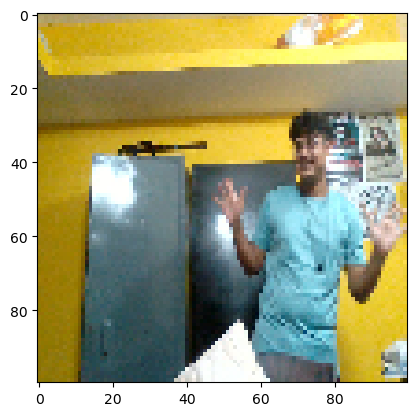

Prediction: umpire
umpire
1/1 [==============================] - 0s 77ms/step
[0.8463286  0.15367135]


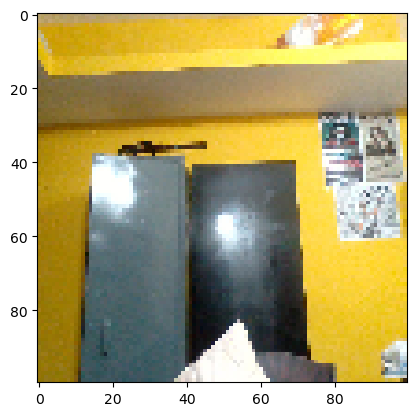

Prediction: normal
normal


In [ ]:
while True:
    capture_image()
    filename = 'img.jpg'
    result=predict(filename)
    print(result)
    time.sleep(5)